<a href="https://colab.research.google.com/github/HarshilGandhi7/Machine-Learning-Basics/blob/main/learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Data Set from MAGIC GAMMA Telescope :
https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope


In [ ]:
# Pandas generally used for data analysis when data is in form of csv,excel
# Numpy generally used when data is in form of matrices
pd.read_csv('magic04.data')

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2      -7.1513  10.4490  116.7370  g  
3      21.8393   4.6480  356.4620  g  
4       9.8145   3.6130  238.0980  g  
...        ...      ...       ... ..  
19014   2.8766   2.4229  106.8258  h  
19015  -2.9632  86.7975  247.4560  h  
19016  -9.4662  30.2987  256.5166  h  
19017 -63.8389  84.6874  408.3166  h  
19018  31.4755  52.7310  272.3174  h  

[19019 rows x 11 columns]

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"]=(df["class"]=="g").astype(int)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

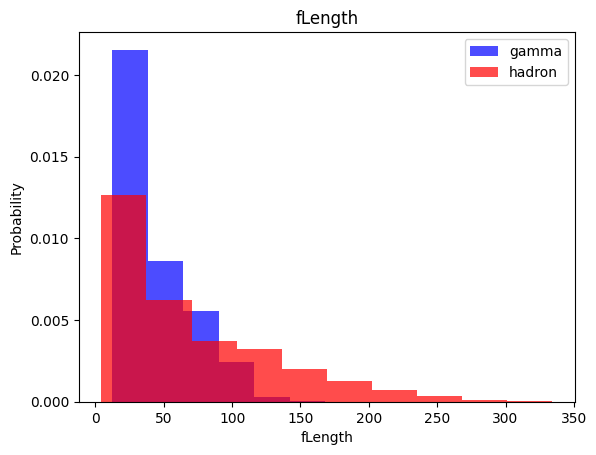

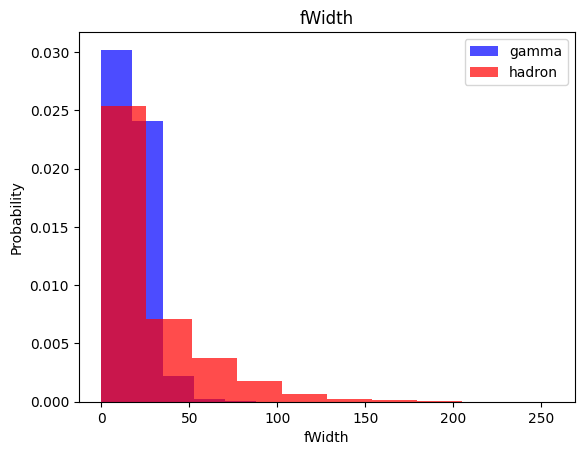

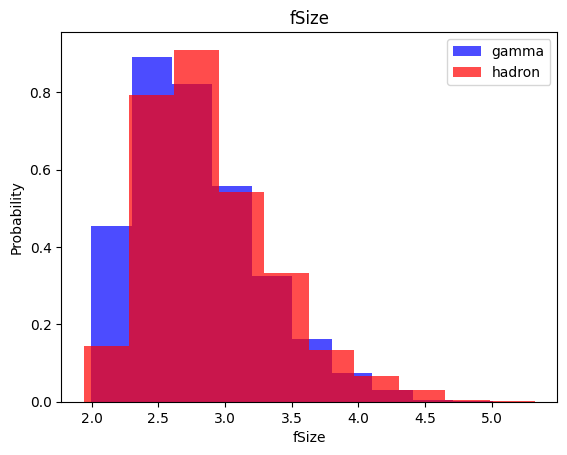

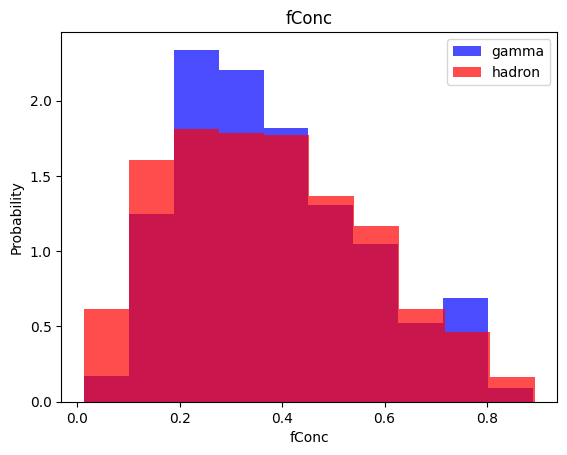

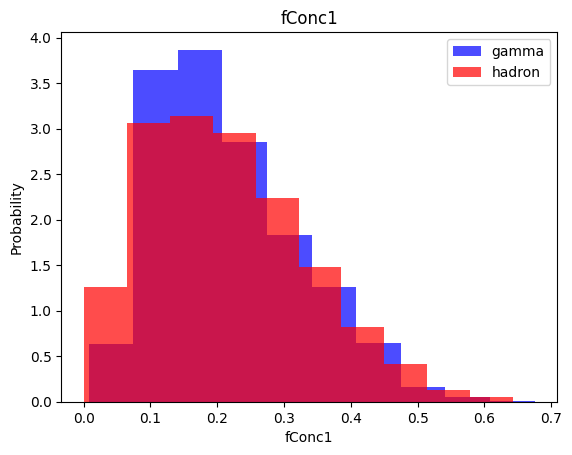

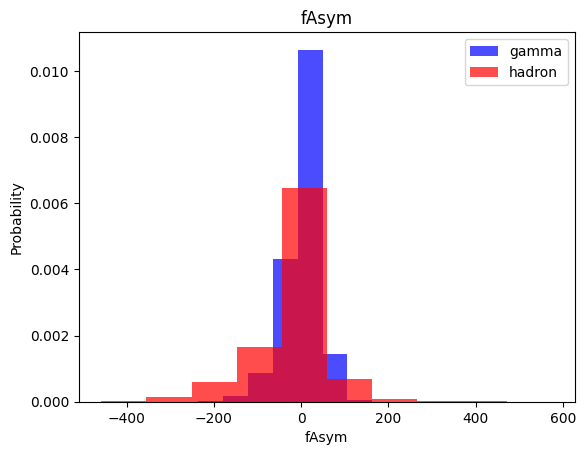

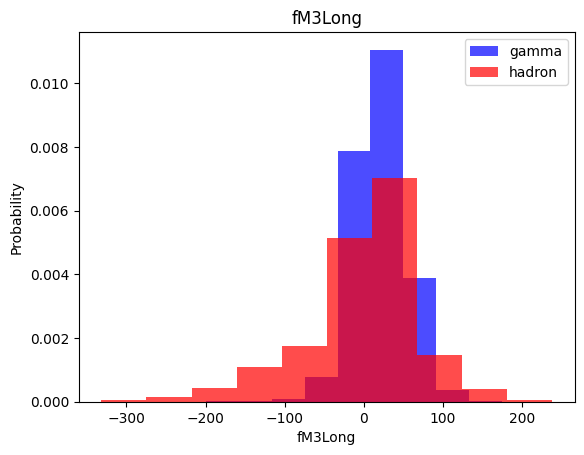

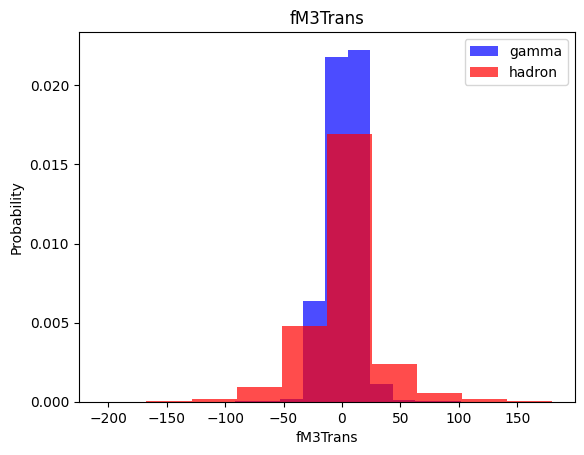

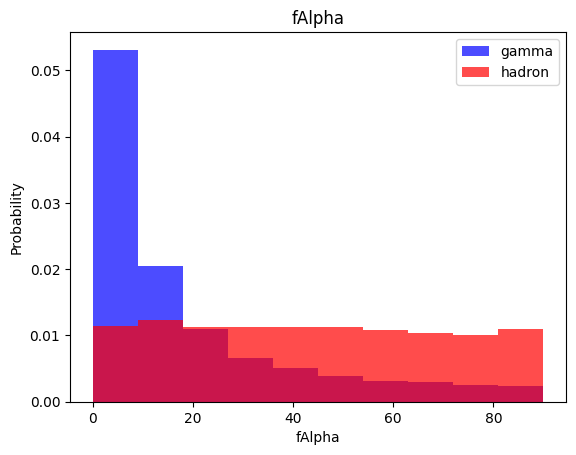

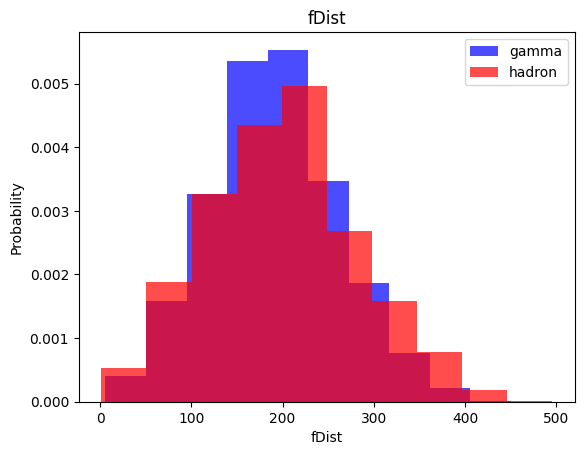

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Training, Validation , test datasets


In [ ]:
train , valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe,overSample=False):
  X=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  X=scaler.fit_transform(X)

  if overSample:
    ros=RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  data=np.hstack((X,np.reshape(y,(-1,1))))

  return data,X,y


In [ ]:
train,X_train,y_train=scale_dataset(train,overSample=True)
valid,X_valid,y_valid=scale_dataset(valid,overSample=False)
test,X_test,y_test=scale_dataset(test,overSample=False)

# kNN- K nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred=knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1327
           1       0.84      0.88      0.86      2477

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [ ]:
  from sklearn.naive_bayes import GaussianNB
  from sklearn.metrics import classification_report

In [ ]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1327
           1       0.74      0.89      0.81      2477

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# we can also pass specific parameters in LogisticRegression Suited Better for Our Use
lg_model=LogisticRegression()
lg_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lg_model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1327
           1       0.84      0.81      0.83      2477

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from metrics import classification_report

In [ ]:
# Can change the parameters as you need ccording to your needs
svm_model=SVC()
svm_model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1360
           1       0.88      0.89      0.89      2444

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report

In [ ]:
from typing import Tuple
def plot_history(history):
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()


Builds a Neural Network and Compiles the Model and Trains the model

In [ ]:
# keras is high leve deep learning api that allows you to build and train neural networks easily

def train_model(X_train,y_train,num_nodes,dropout_prob,learning_range,batch_size,epochs):
  nm_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation="relu",input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation="sigmoid")
  ])

  nm_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

  # Training the neural model and stores it in history variable
  history=nm_model.fit(
    X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0
  )

  return nm_model,history

16 num_nodes, dropout 0, learning range 0.01, batch_size 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3167
16 num_nodes, dropout 0, learning range 0.01, batch_size 64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8607 - loss: 0.3199
16 num_nodes, dropout 0, learning range 0.01, batch_size 128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8665 - loss: 0.3144
16 num_nodes, dropout 0, learning range 0.005, batch_size 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3107
16 num_nodes, dropout 0, learning range 0.005, batch_size 64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.3145
16 num_nodes, dropout 0, learning range 0.005, batch_size 128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8665 - loss: 0.3164
16 num_nodes, dropout 0, learning range 0.003, batch_size 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.3122
16 num_nodes, dropout 0, learning range 0.003, batch_size 64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

<ipython-input-12-949a8c1598ae>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.3135
32 num_nodes, dropout 0, learning range 0.005, batch_size 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8676 - loss: 0.3190
32 num_nodes, dropout 0, learning range 0.005, batch_size 64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8682 - loss: 0.3191
32 num_nodes, dropout 0, learning range 0.005, batch_size 128
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8728 - loss: 0.3088
32 num_nodes, dropout 0, learning range 0.003, batch_size 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3228
32 num_nodes, dropout 0, learning range 0.003, batch_size 64
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8640 - loss: 0.3174
32 num_nodes, dropout 0, learning range 0.003, batch_size 128
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8716 - loss: 0.3082
32 num_nodes, dropout 0.2, learning range 0.01, batch_size 32
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

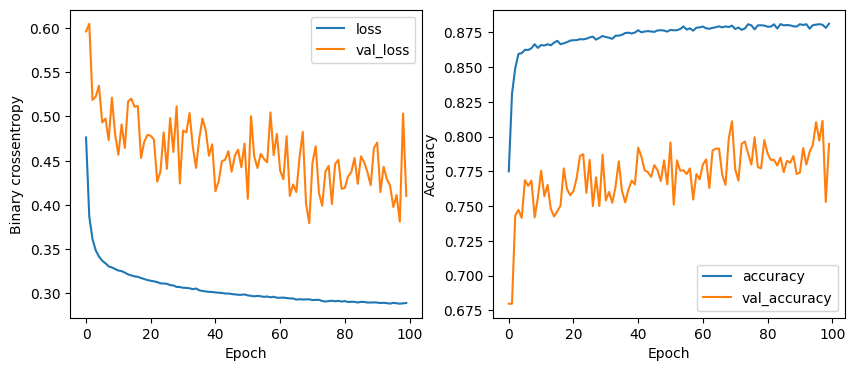

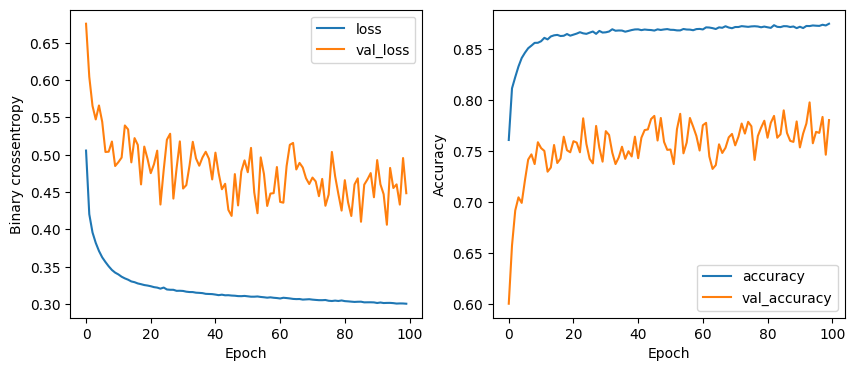

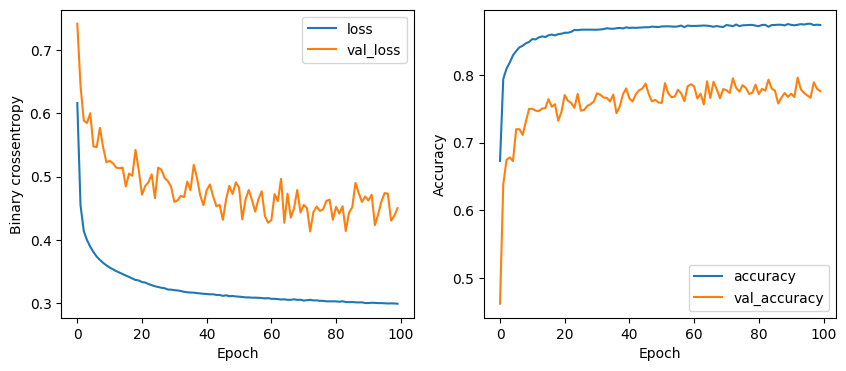

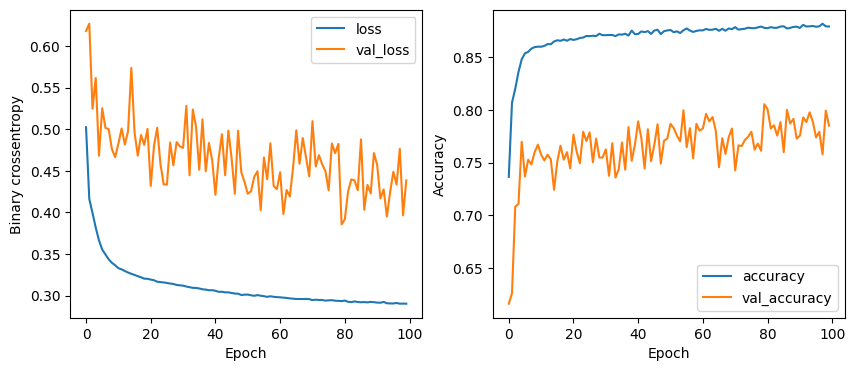

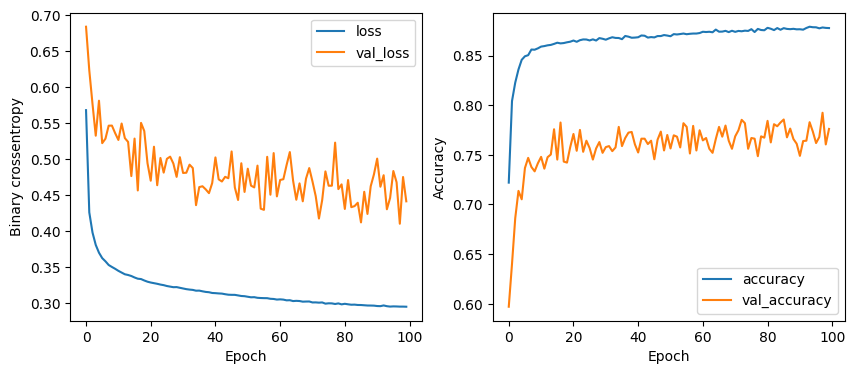

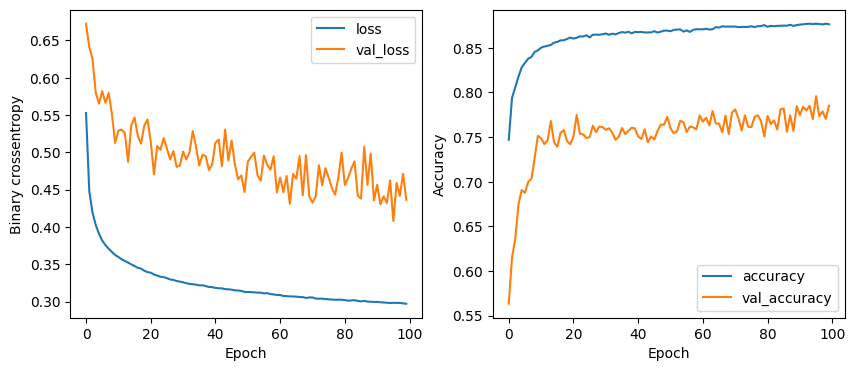

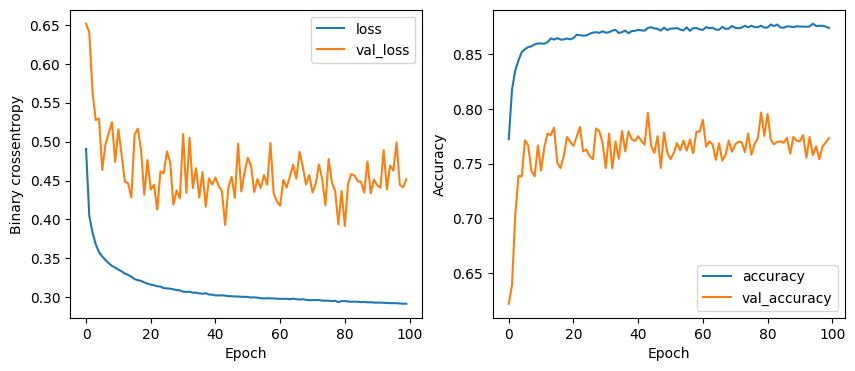

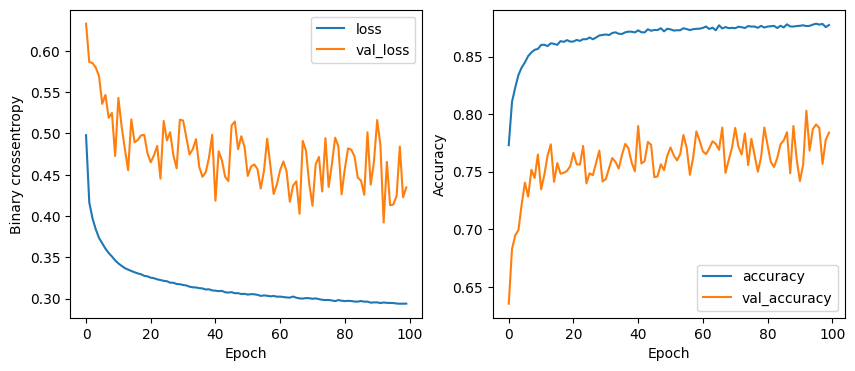

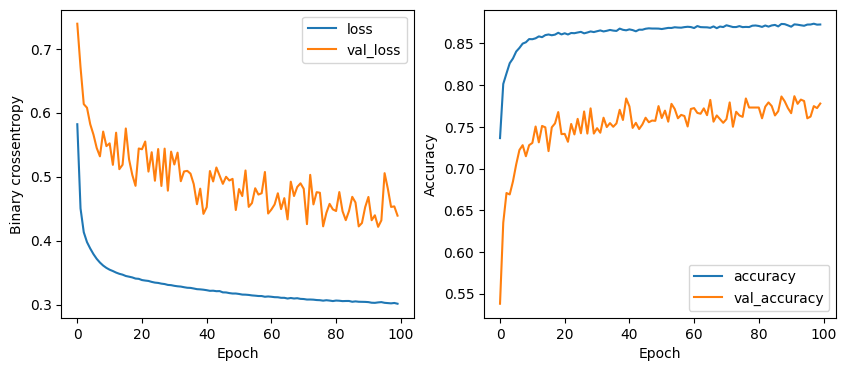

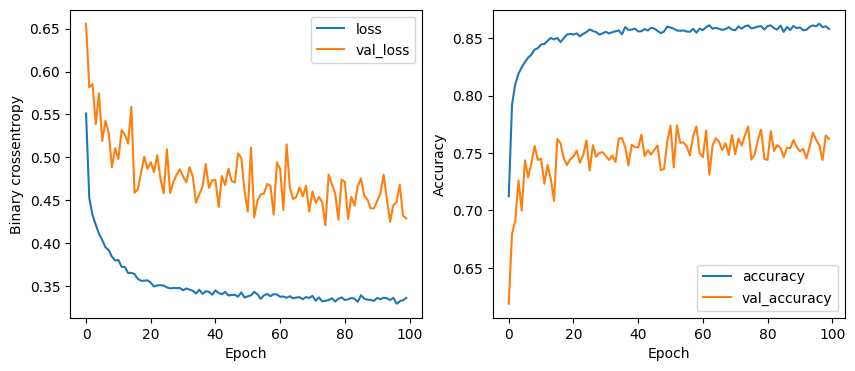

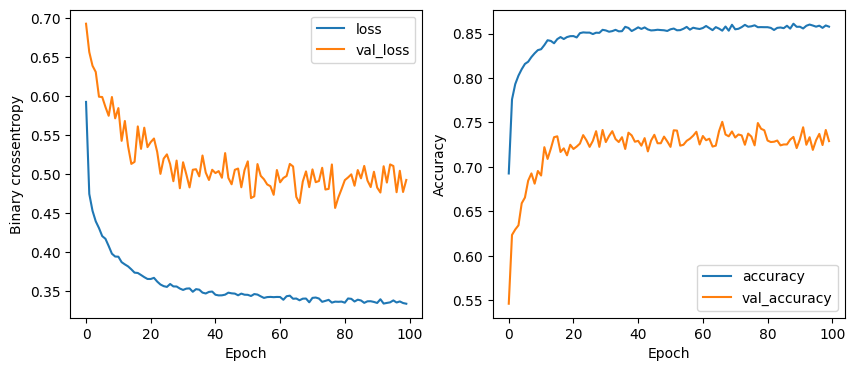

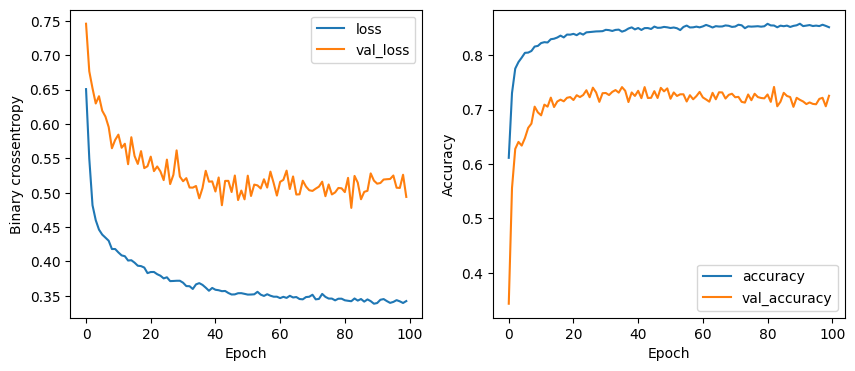

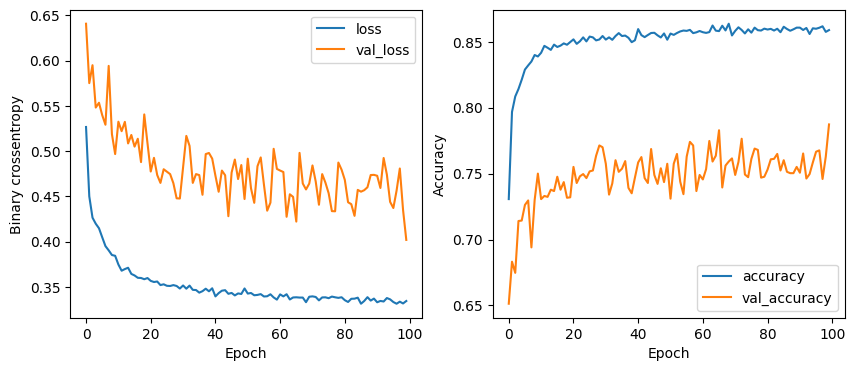

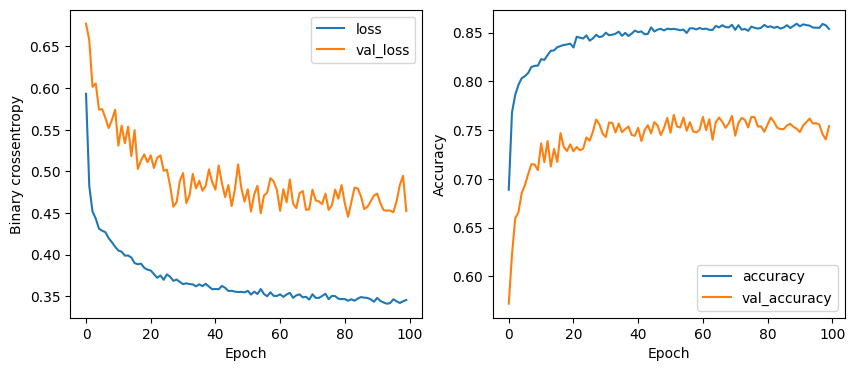

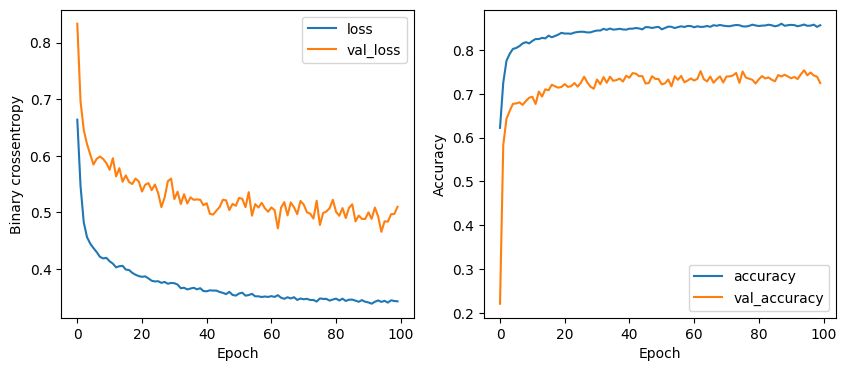

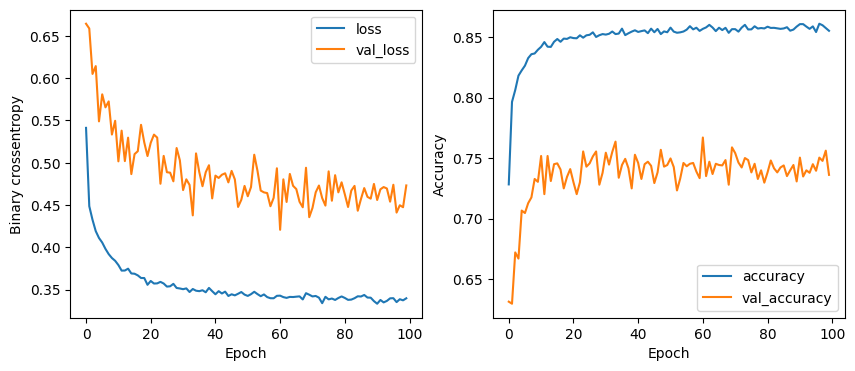

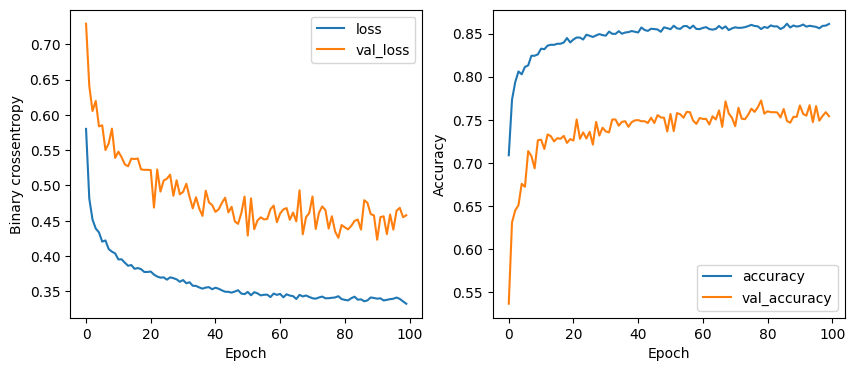

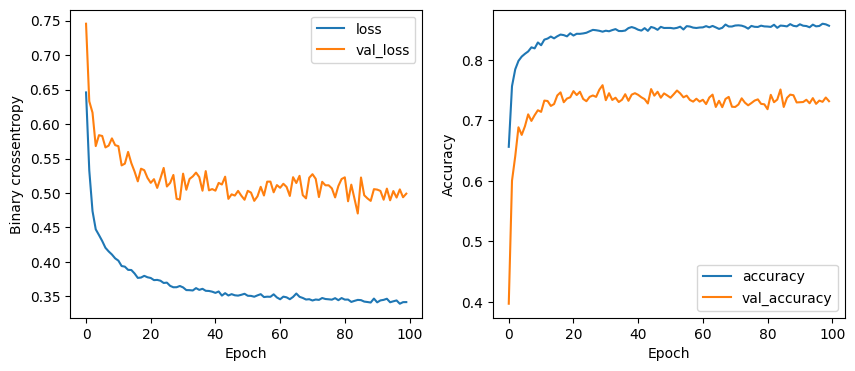

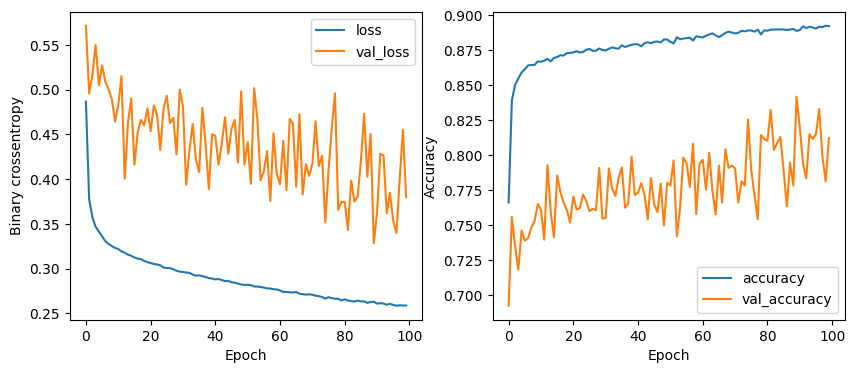

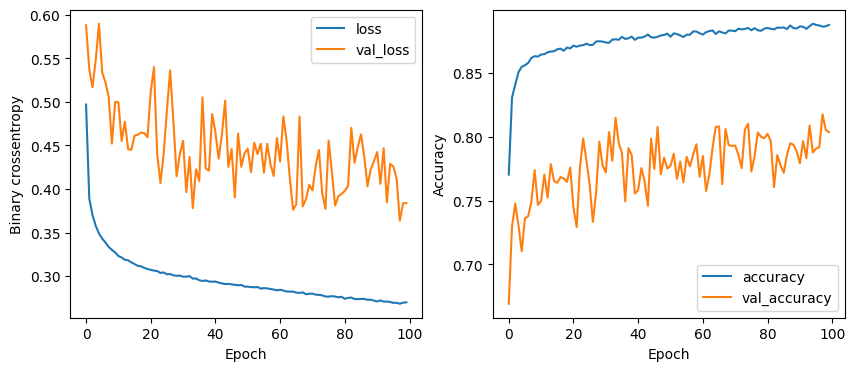

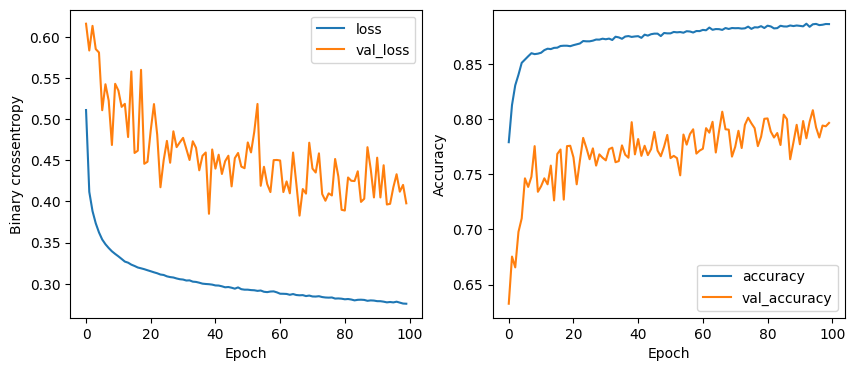

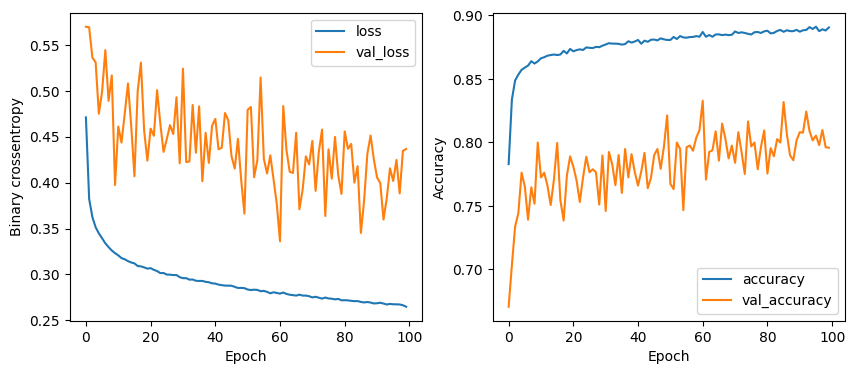

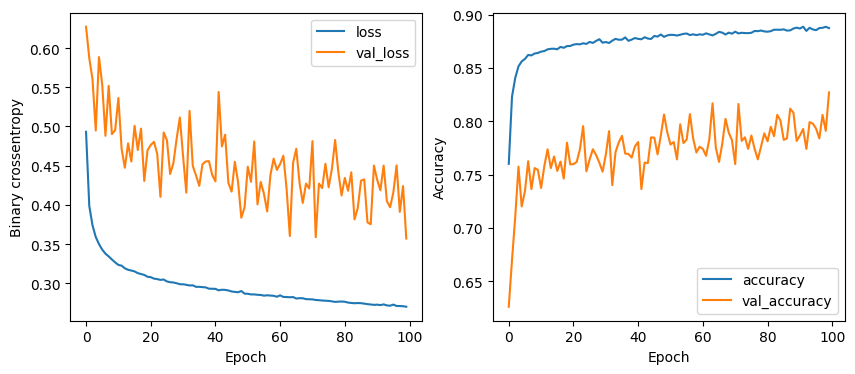

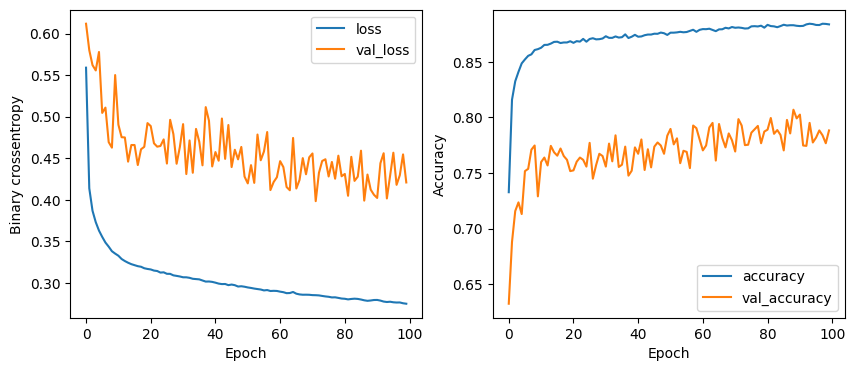

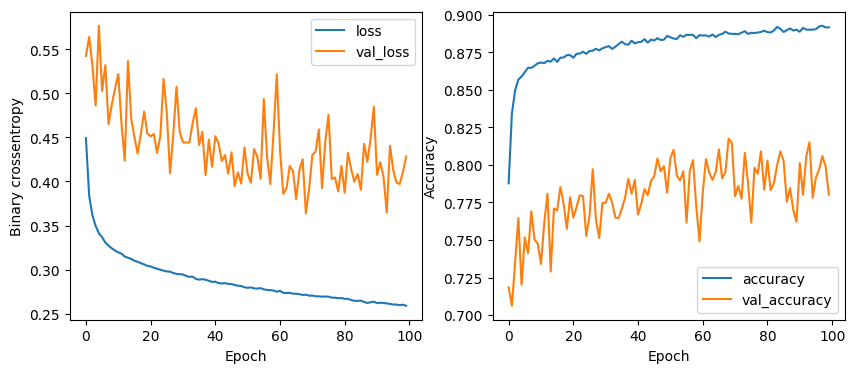

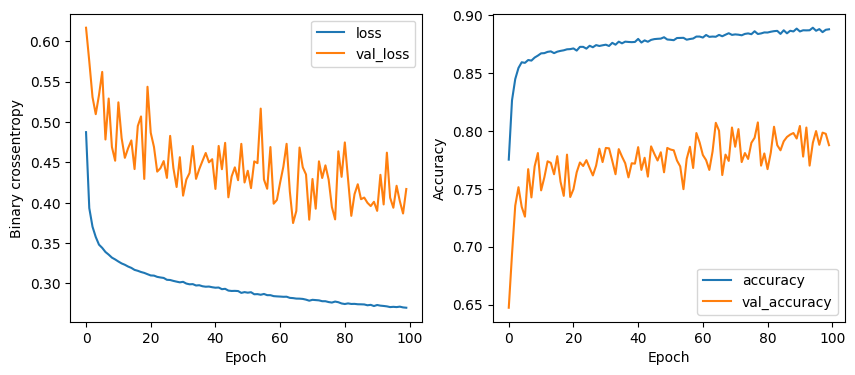

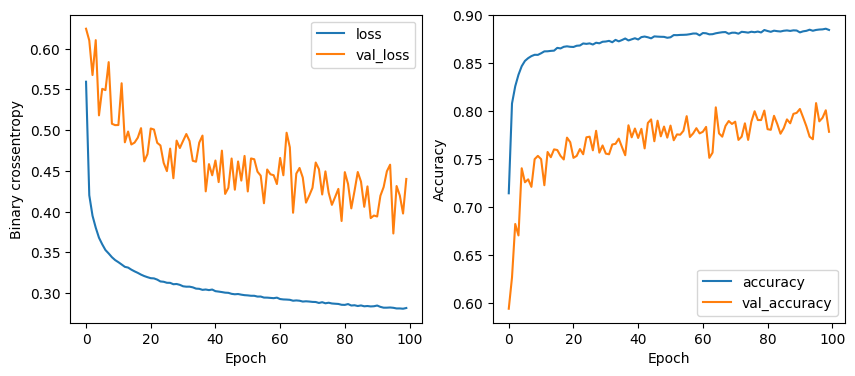

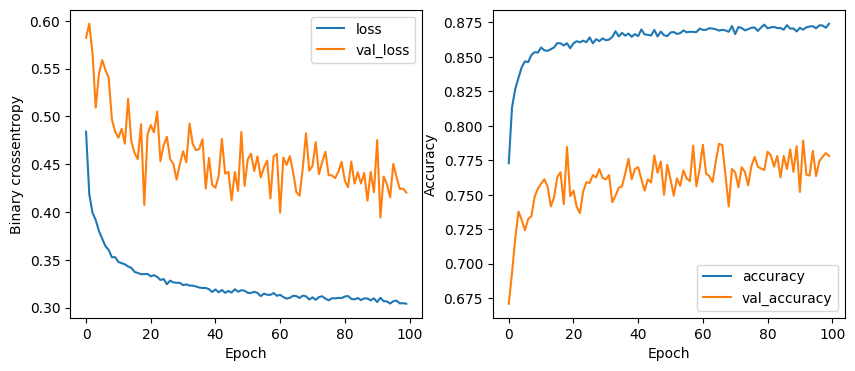

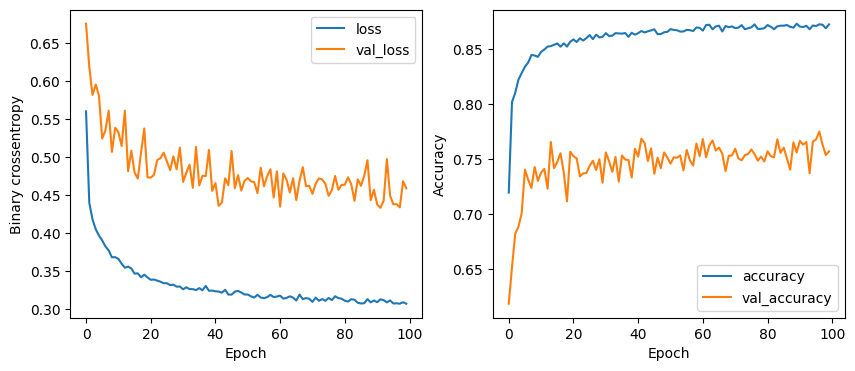

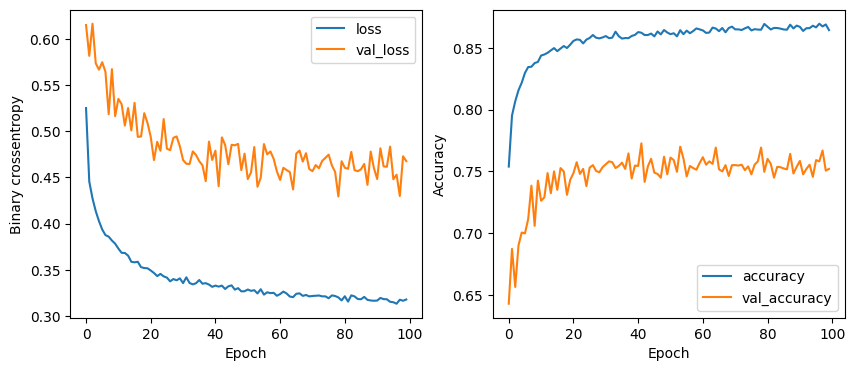

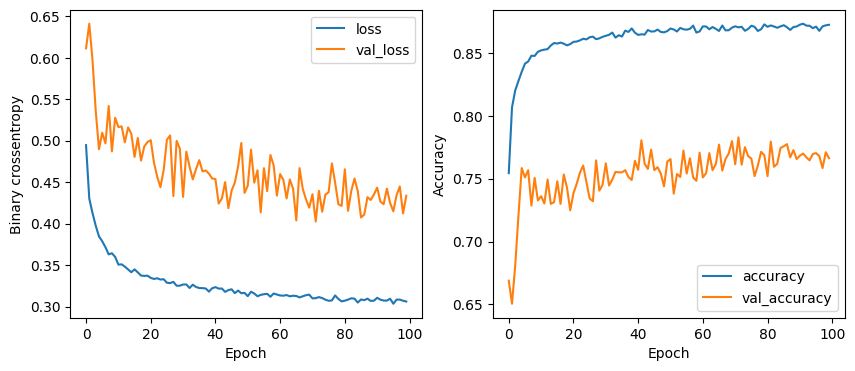

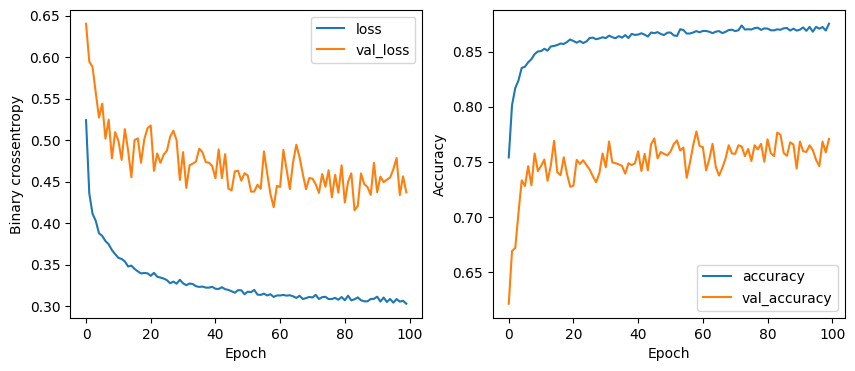

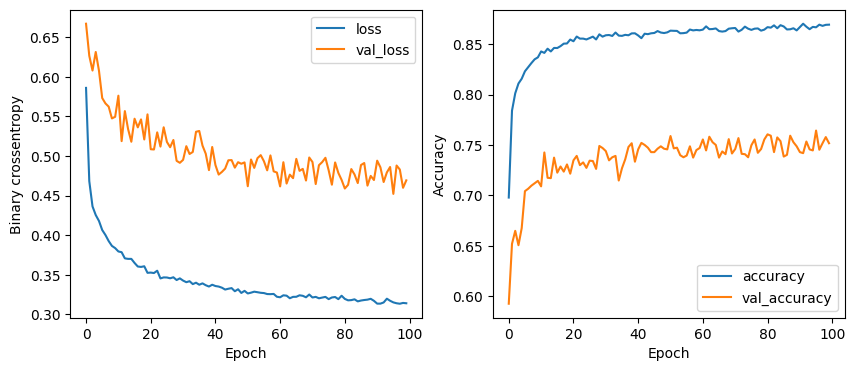

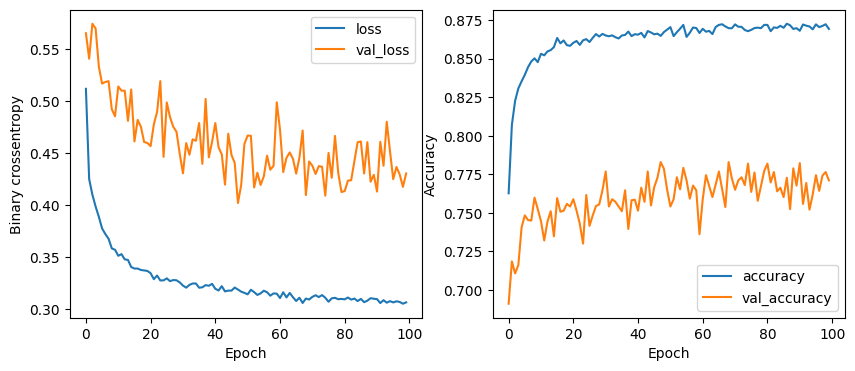

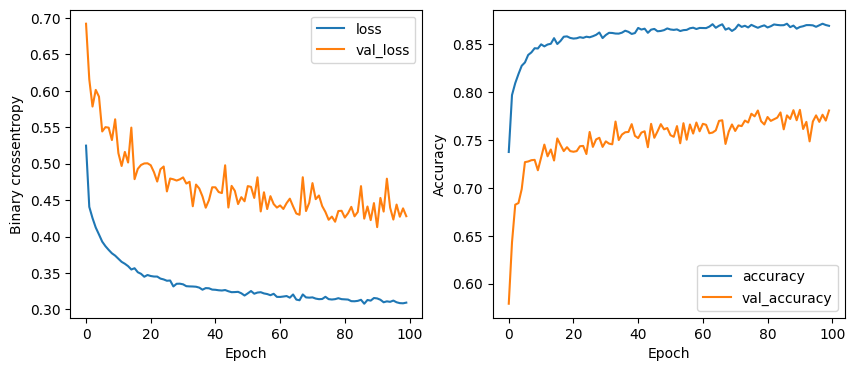

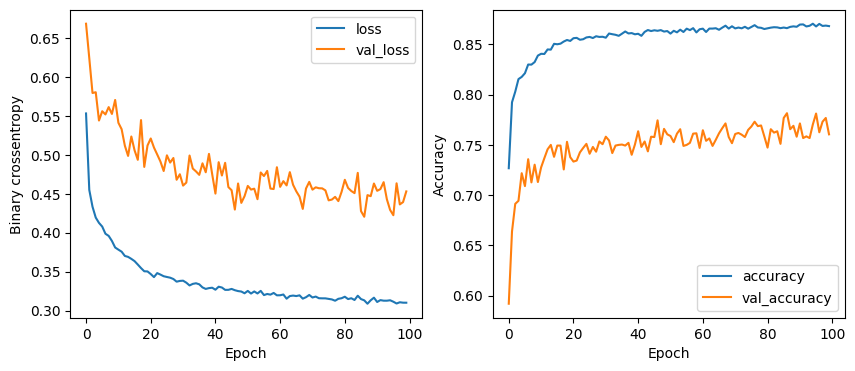

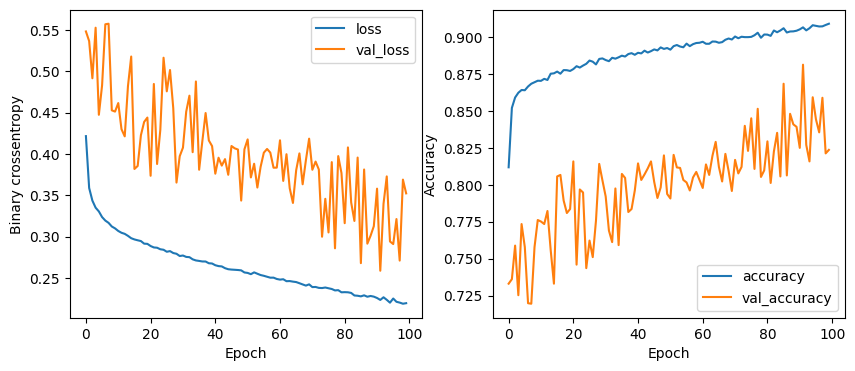

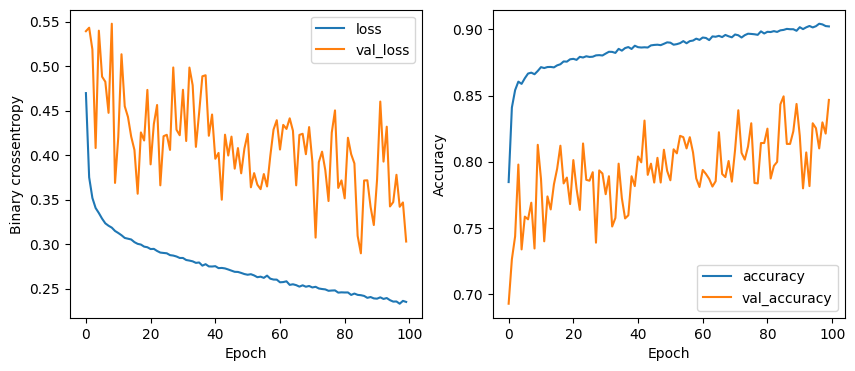

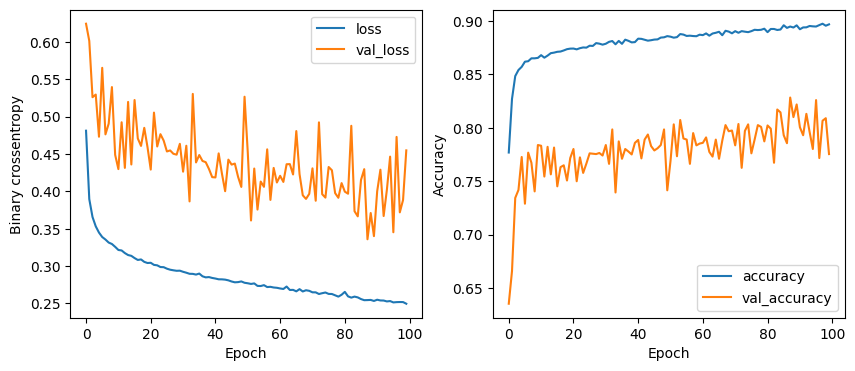

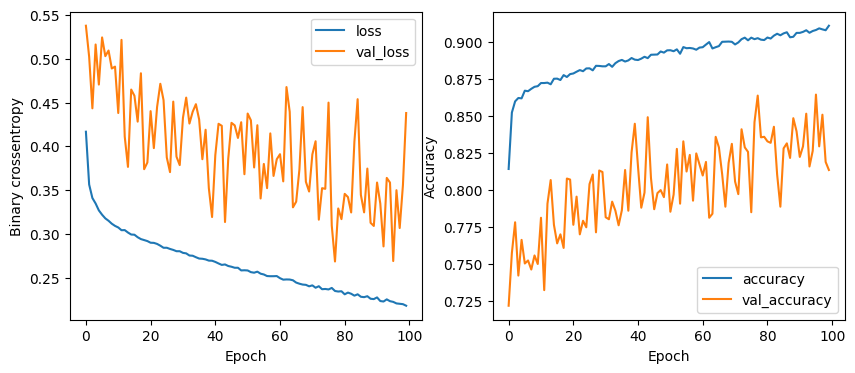

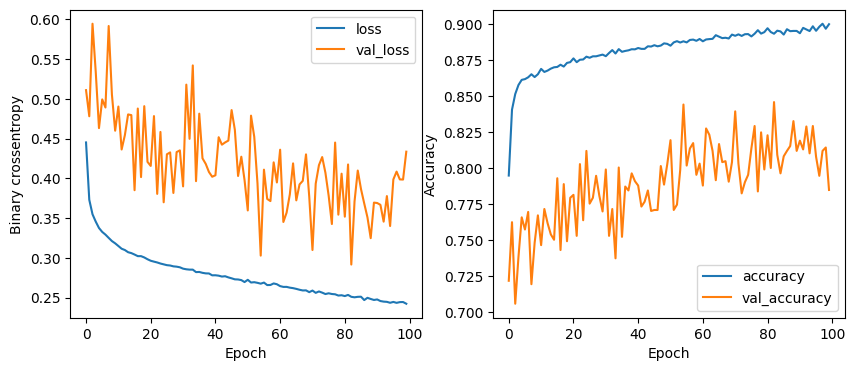

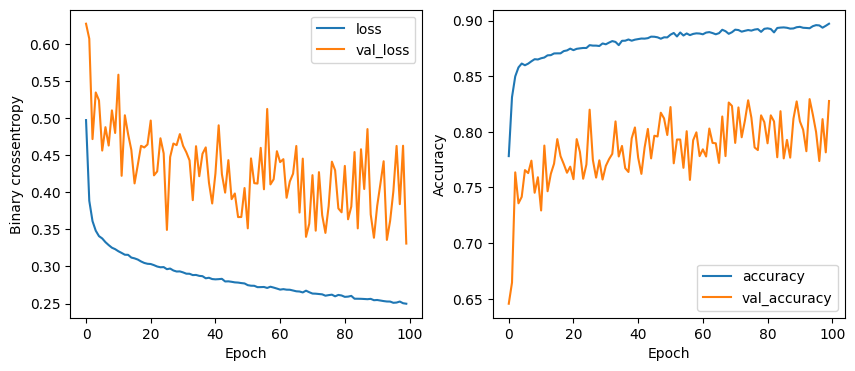

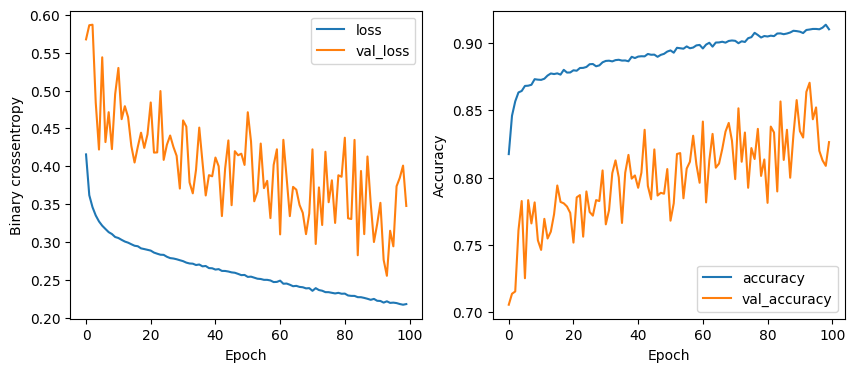

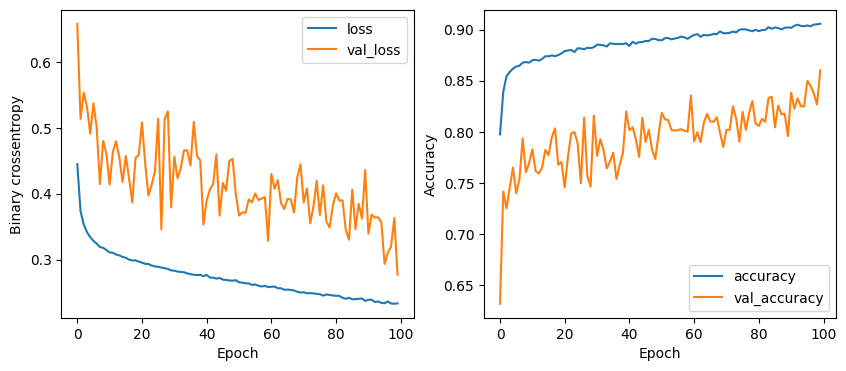

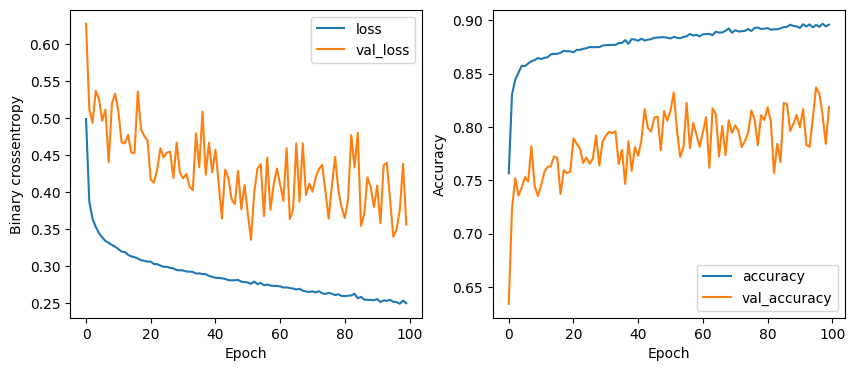

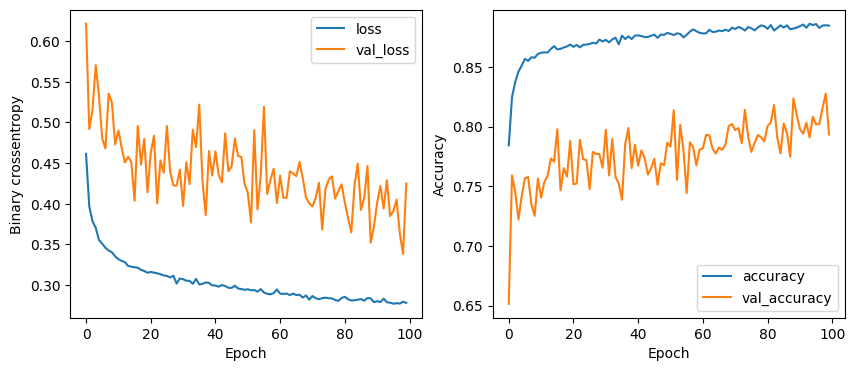

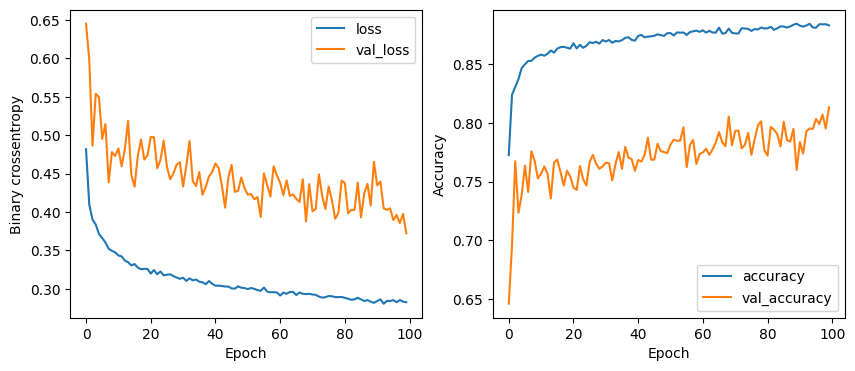

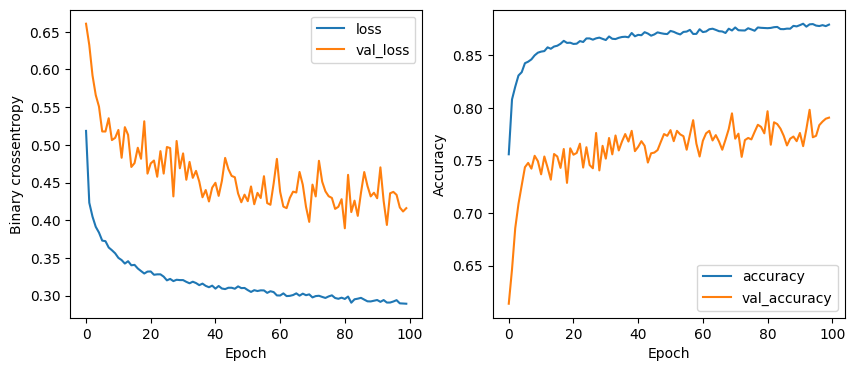

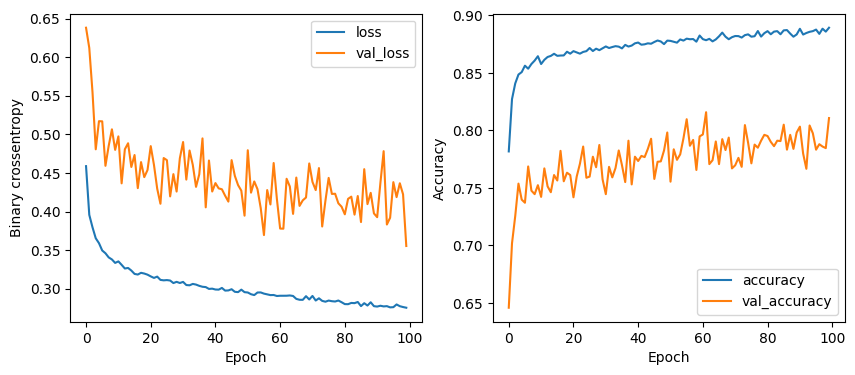

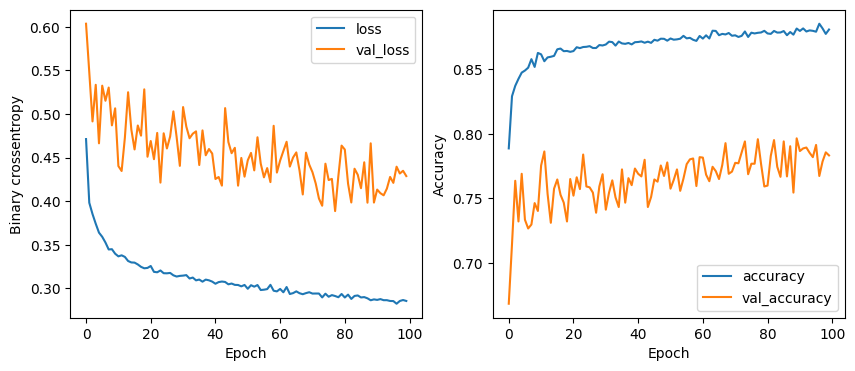

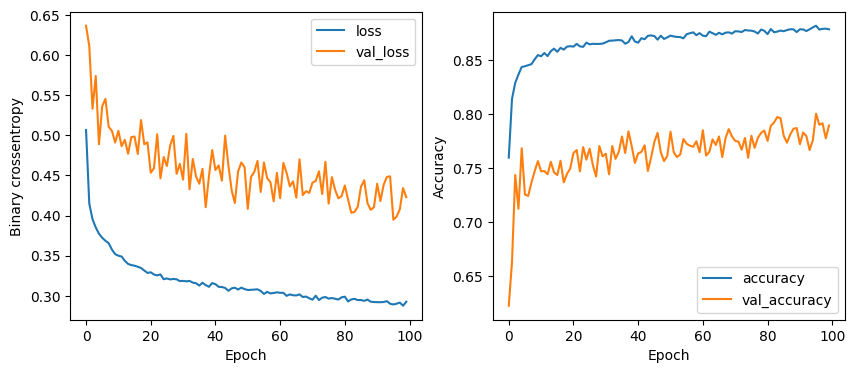

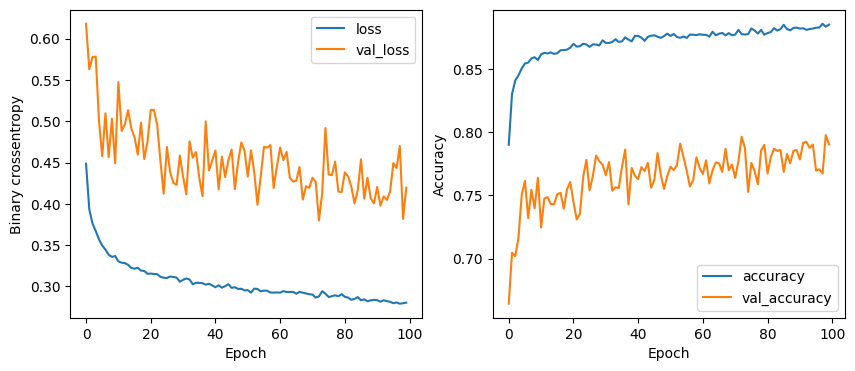

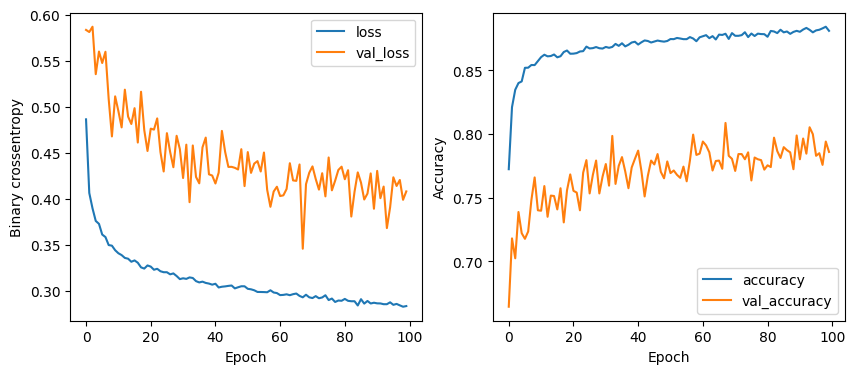

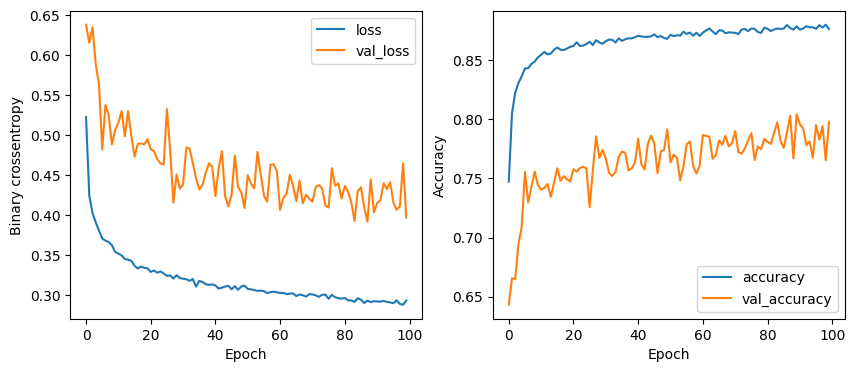

In [ ]:
epochs=100
least_loss=float('inf')
best_model=None
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for learning_range in [0.01,0.005,0.003]:
          for batch_size in [32,64,128]:
            print(f"{num_nodes} num_nodes, dropout {dropout_prob}, learning range {learning_range}, batch_size {batch_size}")
            model,history=train_model(X_train,y_train,num_nodes,dropout_prob,learning_range,batch_size,epochs)
            plot_history(history)
            val_loss = model.evaluate(X_valid,y_valid)
            if isinstance(val_loss, (list, tuple)):
              val_loss = val_loss[0]
            if val_loss<least_loss:
              least_loss=val_loss
              best_model=model

In [ ]:
best_model

<Sequential name=sequential_48, built=True>

In [ ]:
least_loss

0.30482184886932373

In [ ]:
y_pred=best_model.predict(X_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)
y_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1329
           1       0.90      0.94      0.92      2475

    accuracy                           0.89      3804
   macro avg       0.89      0.87      0.88      3804
weighted avg       0.89      0.89      0.89      3804



In [ ]:
!git config --global user.email "harshilgandh312@gmail.com"
!git config --global user.name "HarshilGandhi7"


In [64]:
!git clone https://github.com/HarshilGandhi7/Machine-Learning-Basics.git /content/Machine-Learning-Basics


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Cloning into '/content/Machine-Learning-Basics'...
fatal: Unable to read current working directory: No such file or directory
